**Exploratory Data Analysis (EDA)**

In [70]:
import pandas as pd

# Load the datasets
df_train = pd.read_csv("/content/Titanic_train.csv")
df_test = pd.read_csv("/content/Titanic_test.csv")

# Display the first few rows of the training dataset
print("Training Dataset:")
print(df_train.head())

# Display the first few rows of the testing dataset
print("\nTesting Dataset:")
print(df_test.head())


Training Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [71]:
# Check for missing values in the training dataset
print("Missing values in the training dataset:")
print(df_train.isnull().sum())

# Check for missing values in the testing dataset
print("\nMissing values in the testing dataset:")
print(df_test.isnull().sum())


Missing values in the training dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the testing dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


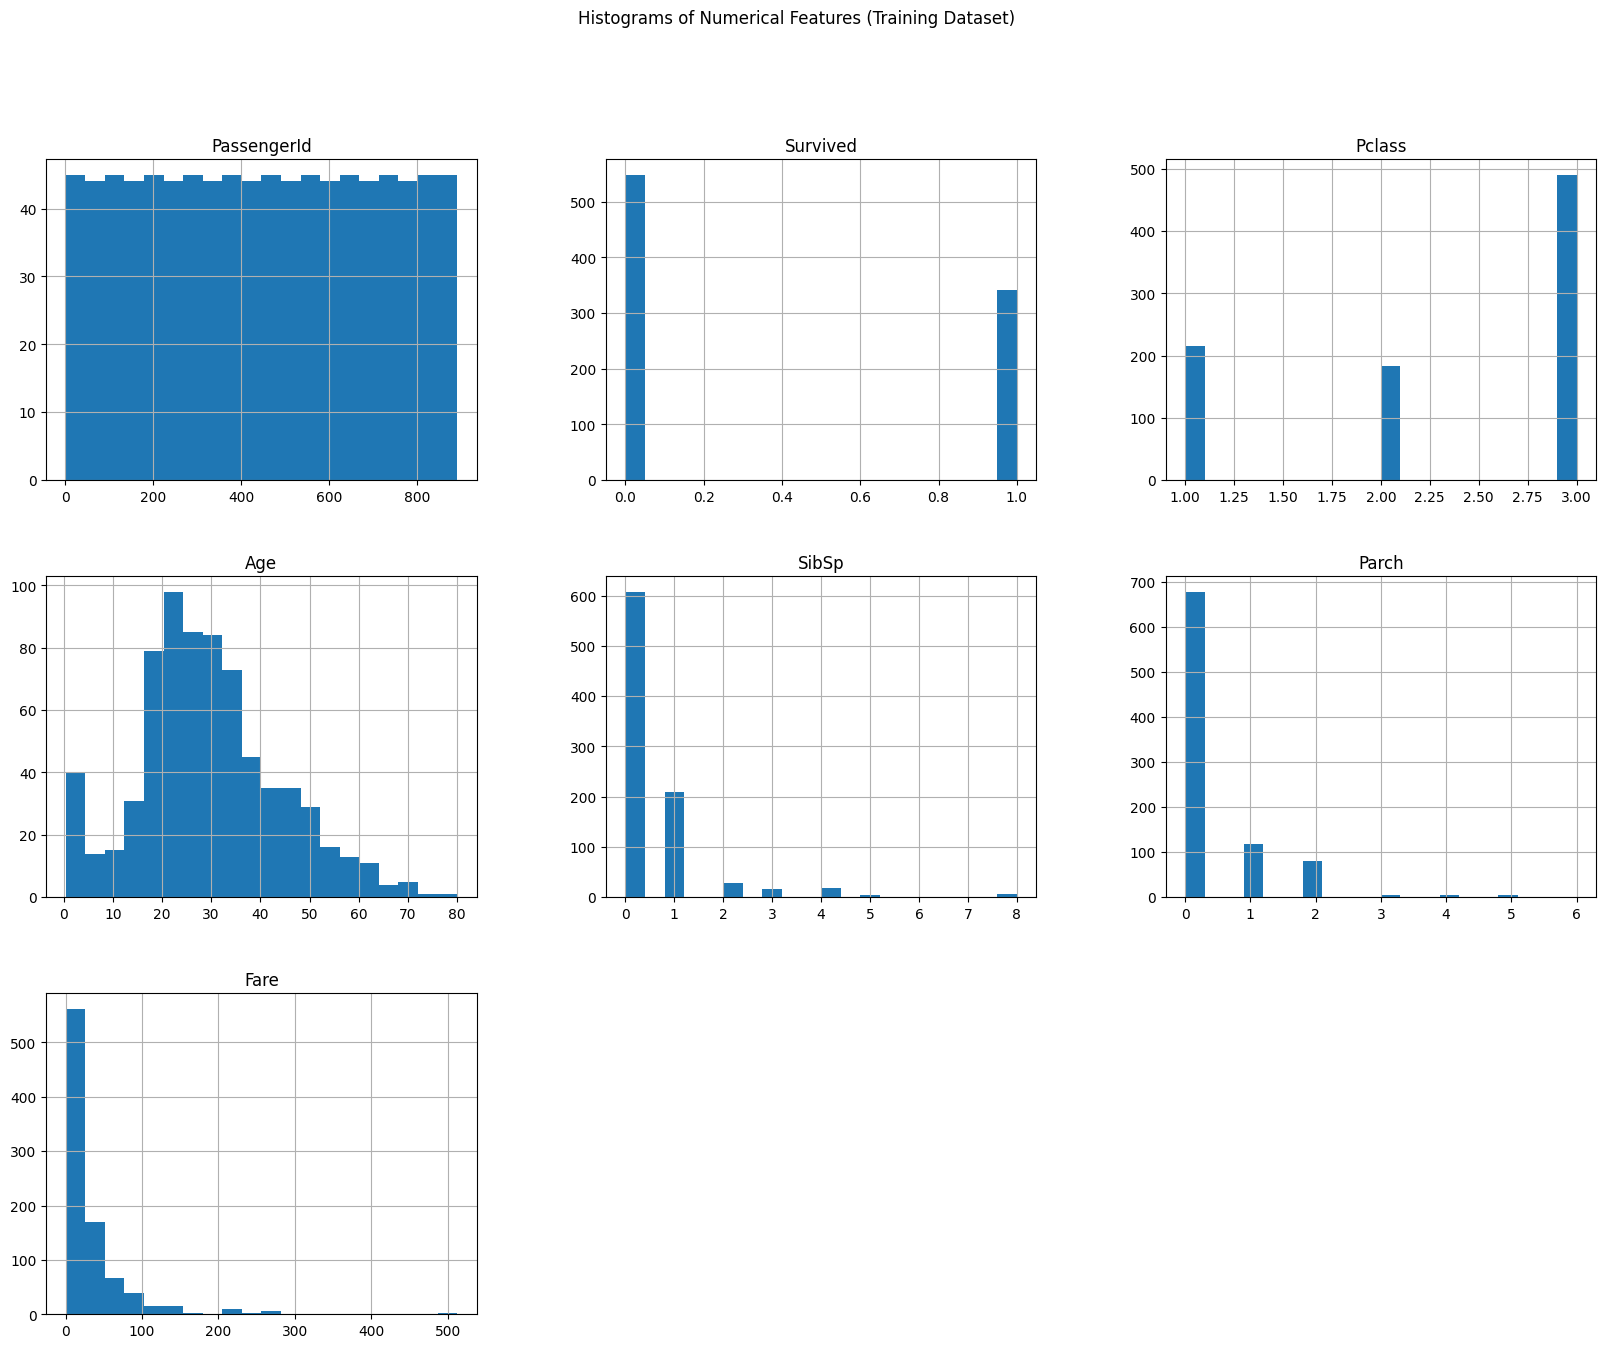

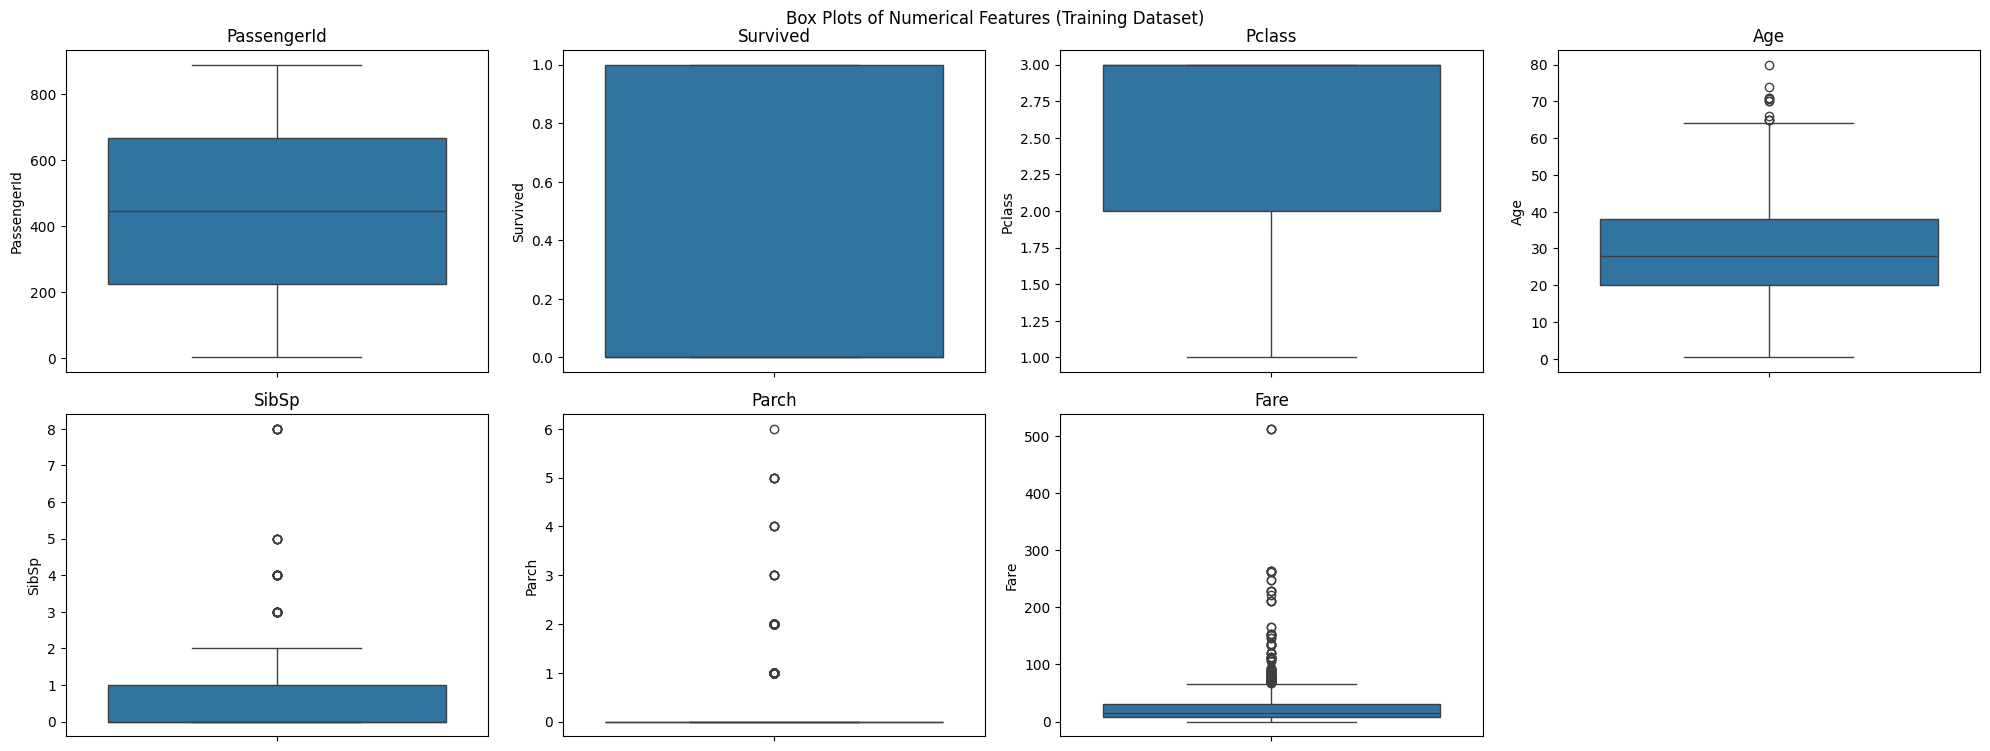

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features in the training dataset
df_train.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features (Training Dataset)')
plt.show()

# Plot box plots for numerical features in the training dataset
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_train.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_train[column])
    plt.title(column)
plt.suptitle('Box Plots of Numerical Features (Training Dataset)')
plt.tight_layout()
plt.show()


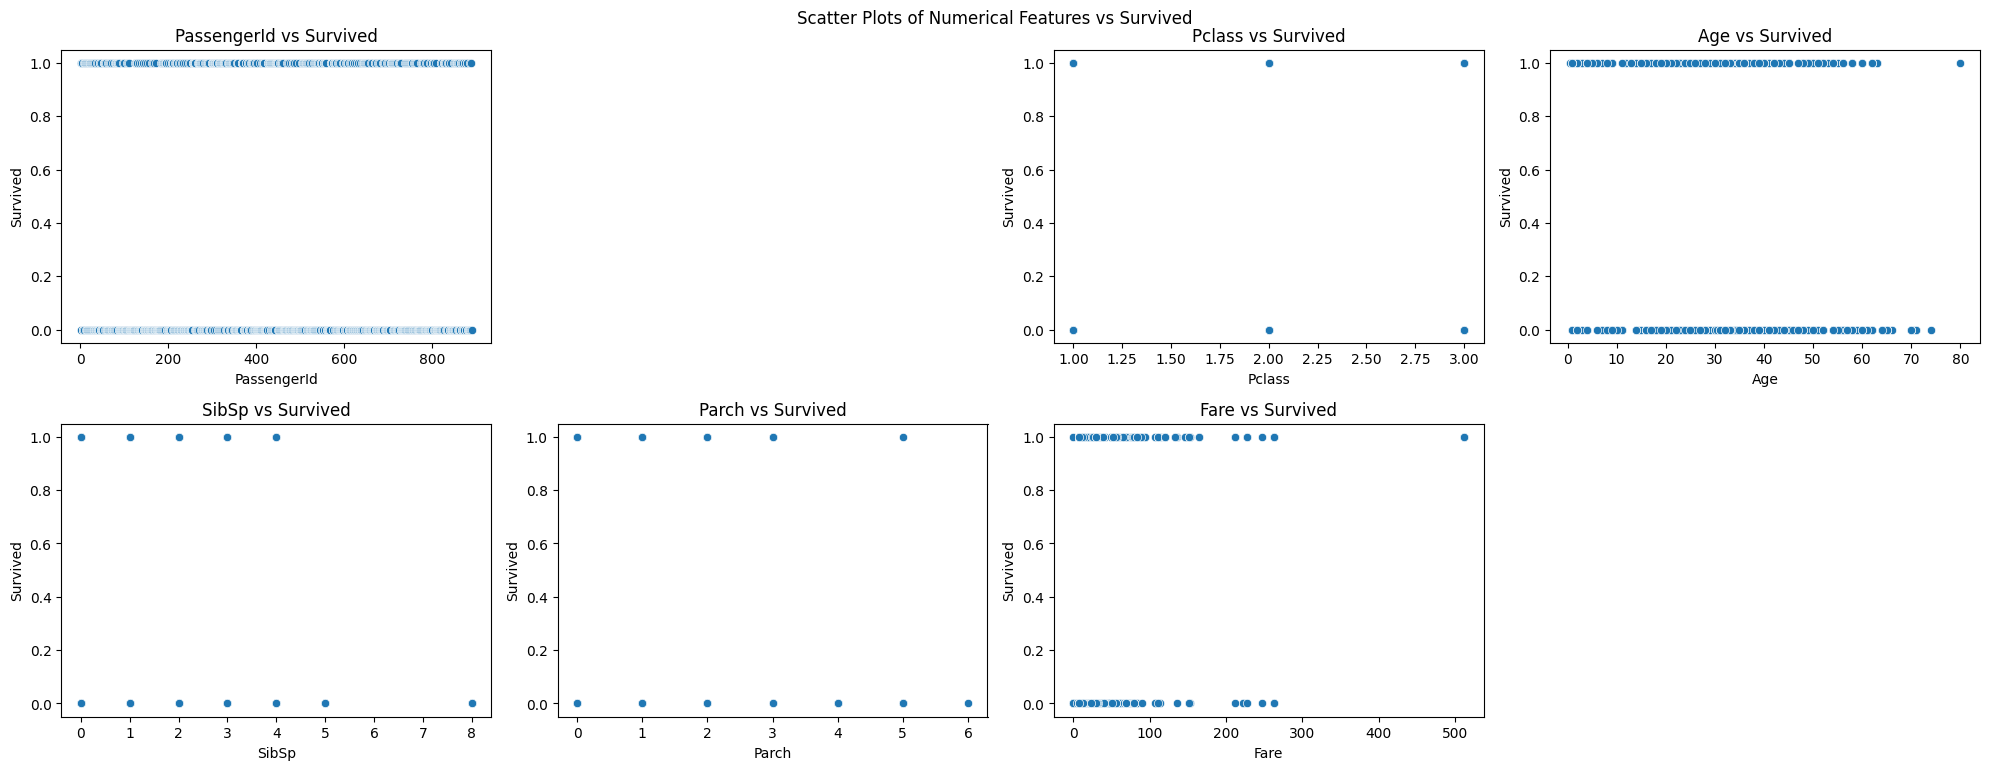

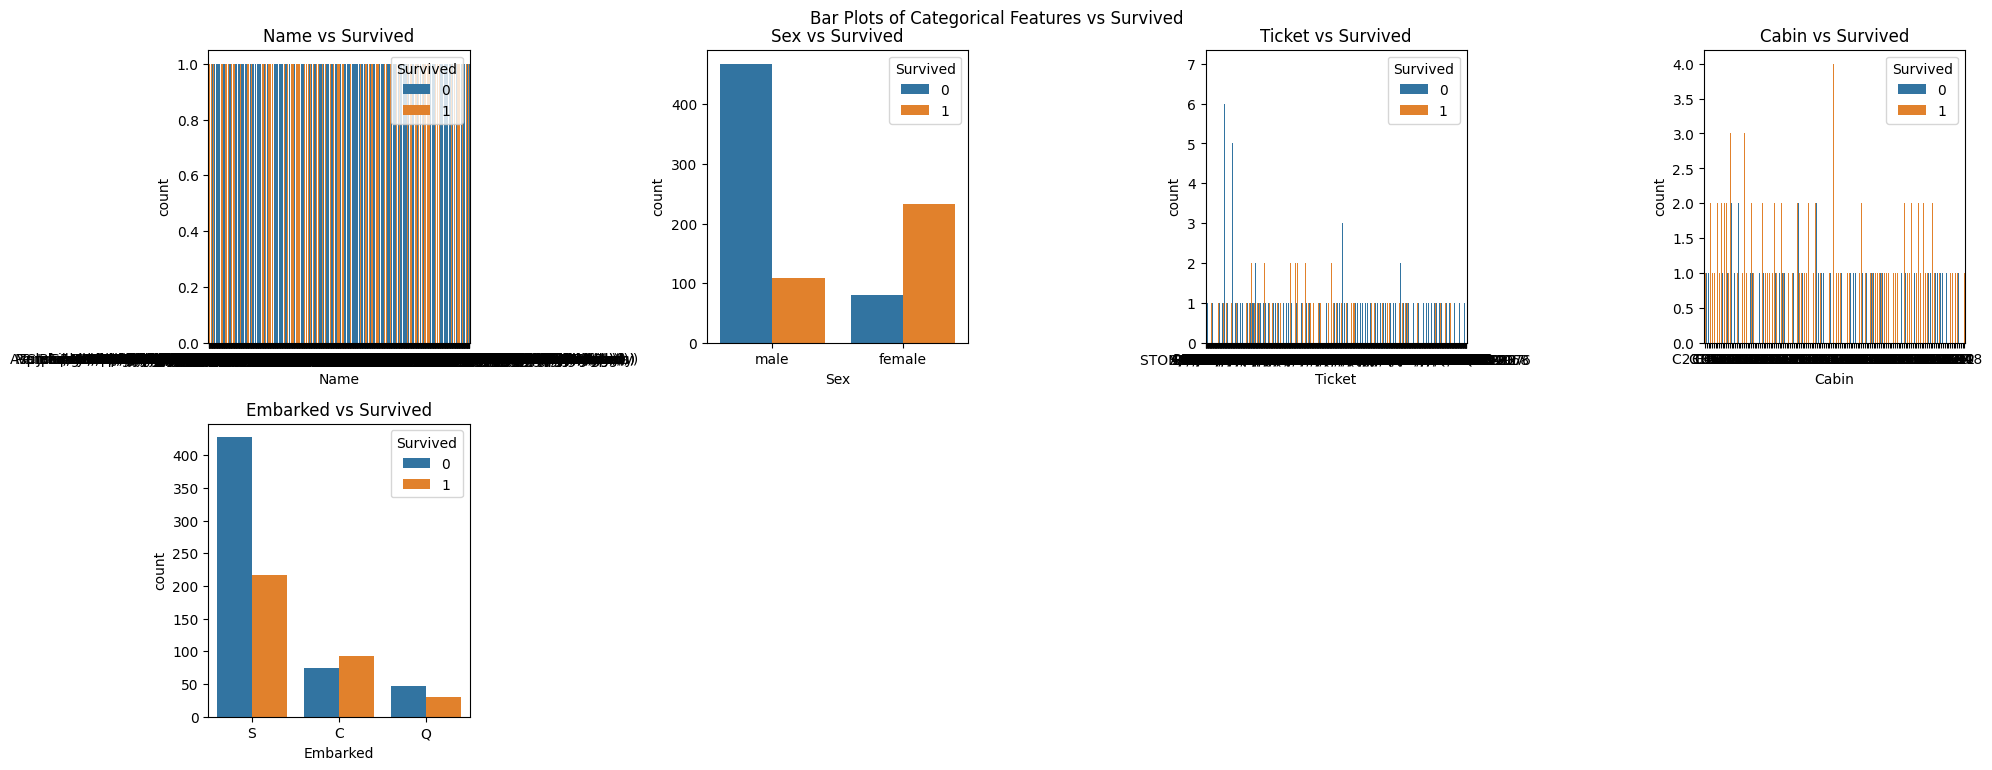

In [73]:
# Scatter plots for numerical features against the target variable (Survived)
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_features, 1):
    if column != 'Survived':
        plt.subplot(4, 4, i)
        sns.scatterplot(x=df_train[column], y=df_train['Survived'])
        plt.title(f"{column} vs Survived")
plt.suptitle('Scatter Plots of Numerical Features vs Survived')
plt.tight_layout()
plt.show()

# Bar plots for categorical features against the target variable (Survived)
categorical_features = df_train.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=df_train[column], hue=df_train['Survived'])
    plt.title(f"{column} vs Survived")
plt.suptitle('Bar Plots of Categorical Features vs Survived')
plt.tight_layout()
plt.show()


** Data Preprocessing**

In [74]:
# 1. Impute missing values
from sklearn.impute import SimpleImputer

# Impute missing values for numerical features
numerical_features = ['Age', 'Fare']
imputer = SimpleImputer(strategy='median')
df_train[numerical_features] = imputer.fit_transform(df_train[numerical_features])
df_test[numerical_features] = imputer.transform(df_test[numerical_features])

# Impute missing values for categorical features (example: Embarked)
categorical_features = ['Embarked']
imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_features] = imputer.fit_transform(df_train[categorical_features])
df_test[categorical_features] = imputer.transform(df_test[categorical_features])

# 2. Encode categorical variables using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_train_encoded = pd.DataFrame(encoder.fit_transform(df_train[categorical_features]).toarray())
df_test_encoded = pd.DataFrame(encoder.transform(df_test[categorical_features]).toarray())

# Concatenate encoded categorical features with original dataframe
df_train_final = pd.concat([df_train, df_train_encoded], axis=1)
df_test_final = pd.concat([df_test, df_test_encoded], axis=1)



**Building Predictive Models**

In [75]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Define categorical features
categorical_features = ['Sex', 'Embarked']

# Drop non-numeric columns ('Name', 'Ticket', 'Cabin')
df_train = df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    df_train[feature] = label_encoder.fit_transform(df_train[feature])
    df_test[feature] = label_encoder.transform(df_test[feature])

# Split the dataset into features and target
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test

# Build and train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Build and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Comparative Analysis**

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define categorical features
categorical_features = ['Sex', 'Embarked']

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for feature in categorical_features:
    df_train[feature] = label_encoder.fit_transform(df_train[feature].astype(str))
    df_test[feature] = label_encoder.transform(df_test[feature].astype(str))

# Split the dataset into features and target
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_test
# y_test = df_test['Survived']  # No 'Survived' column in test data

# Build and train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Build and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predictions using LightGBM model
lgb_pred = lgb_model.predict(X_test)

# Predictions using XGBoost model
xgb_pred = xgb_model.predict(X_test)




[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
